In [6]:
import sys
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import matplotlib.pyplot as plt
from PySide6.QtWidgets import QApplication
from temgymbasic.gui import TemGymWindow

import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic import gbd

from typing import Tuple, NamedTuple
from temgymbasic.plotting import plot_model
%matplotlib ipympl

In [7]:
n_rays = 1000
wavelength = 0.1
k = 2 * np.pi / wavelength

wavelengths = np.full(n_rays, wavelength)
a = 10
focal = 15
b = 5

size = 1000
det_shape = (size, size)
pixel_size = 1 / size
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

wo = 0.3
wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths 

theta_x = 1
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)

x0 = 0.01
y0 = 0

In [8]:
components = (
    comp.PointBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        semi_angle = 0.01,
        # radius=x0,
        # wo=wo,
        tilt_yx=tilt_yx
    ),
    # comp.GaussBeam(
    #     z=0.0,
    #     voltage=calculate_phi_0(wavelength),
    #     radius=x0,
    #     wo=wo,
    #     tilt_yx=tilt_yx
    # ),
    comp.PerfectLens(
        z = a,
        f = 10,
        z1 = -a,
        z2 = b
    ),
    comp.AccumulatingDetector(
        z=a + b,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=64,
    ),
)

In [9]:
model = Model(components)
rays = tuple(model.run_iter(num_rays=n_rays))
image = model.detector.get_image(rays[-1])
det_x = np.linspace(-det_shape[1]//2*pixel_size, det_shape[1]//2*pixel_size, det_shape[1])

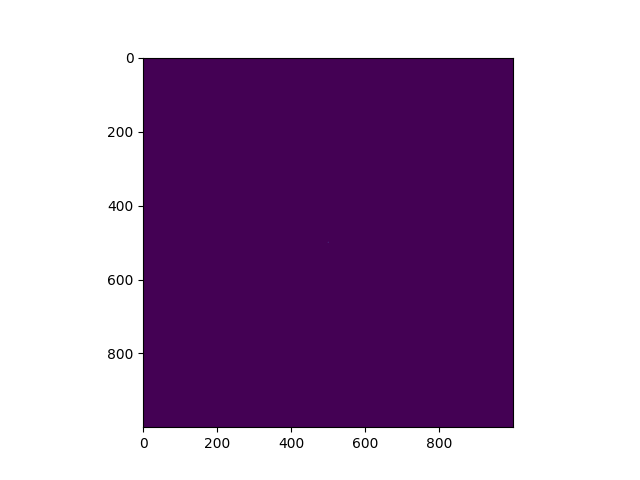

In [5]:
plt.figure()
plt.imshow(image)